In [ ]:
!pip3 install dlib
!pip3 install face_recognition==1.2.2
!pip3 install Pillow

In [1]:
import PIL.Image
import PIL.ImageDraw
import face_recognition
from pathlib import Path
import os

## Detecting the presence of face(s) in an image

Total 3 face(s) found


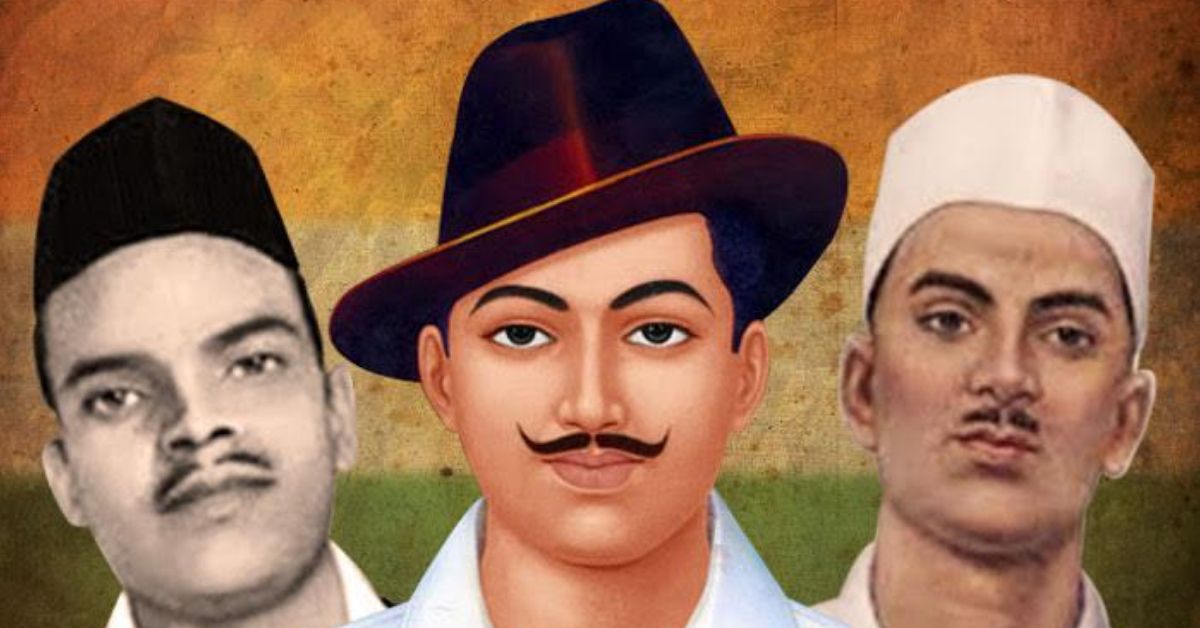

In [2]:
# importing the image, converting it to pil image and determining face locations
control_image = face_recognition.load_image_file("great-indians.jpg")
#pil_image_rect = PIL.Image.fromarray(control_image)
face_locations = face_recognition.face_locations(control_image)
number_of_faces = len(face_locations)
print('Total {} face(s) found'.format(number_of_faces))
display(PIL.Image.fromarray(control_image))

Found face at Top: 241, Left: 740, Bottom: 562, Right: 419
Found face at Top: 260, Left: 1122, Bottom: 528, Right: 854
Found face at Top: 277, Left: 384, Bottom: 598, Right: 63


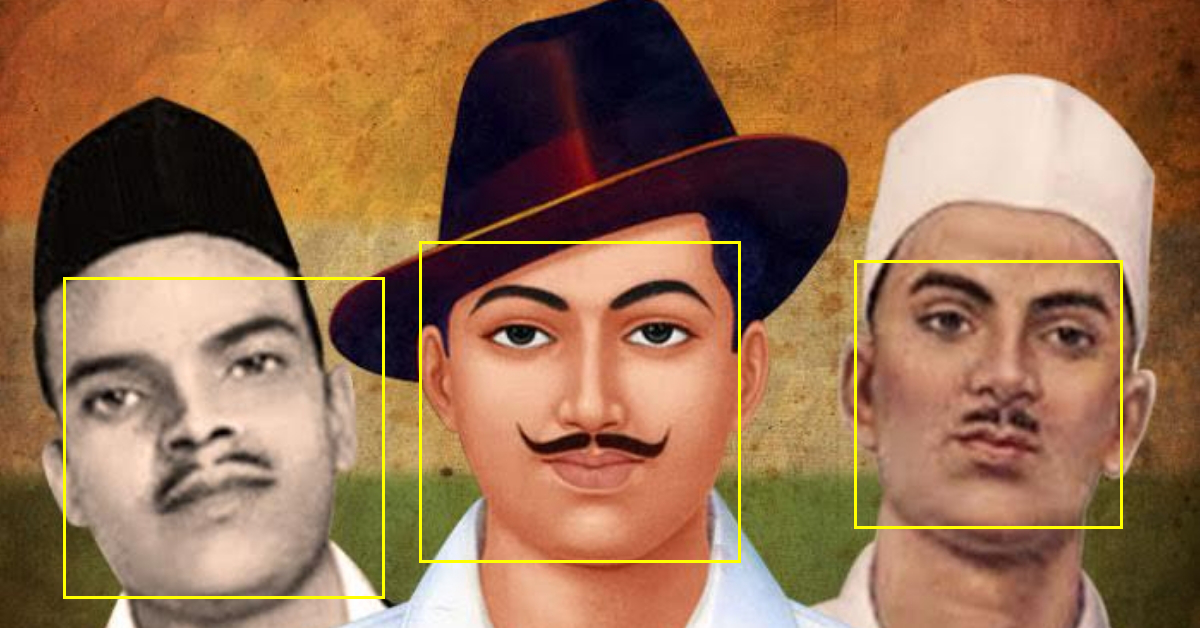

In [3]:
# marking each face into a rectangle
pil_image_rect = PIL.Image.fromarray(control_image)
for face_location in face_locations:
    top, right, bottom, left = face_location
    print('Found face at Top: {}, Left: {}, Bottom: {}, Right: {}'.format(top, right, bottom, left))
    draw = PIL.ImageDraw.Draw(pil_image_rect)
    draw.rectangle([left, top, right, bottom], outline='yellow', width = 3)
    
# displaying the image modified with having rectangles on face
display(pil_image_rect)

## Finding face landmarks

"Face landmarks" is features-location mapping, where features can be landmarks of a face, i.e. eyes, noes, lips, etc

Landmark: chin
Locus: [(247, 104), (247, 115), (248, 127), (250, 139), (254, 150), (263, 159), (274, 167), (286, 172), (299, 173), (311, 170), (320, 162), (327, 153), (332, 142), (333, 131), (334, 120), (334, 109), (334, 99)]


Landmark: left_eyebrow
Locus: [(258, 97), (263, 91), (271, 88), (280, 88), (289, 91)]


Landmark: right_eyebrow
Locus: [(302, 90), (309, 87), (317, 86), (324, 88), (328, 94)]


Landmark: nose_bridge
Locus: [(295, 98), (296, 105), (297, 113), (298, 120)]


Landmark: nose_tip
Locus: [(287, 125), (292, 127), (298, 129), (302, 127), (307, 124)]


Landmark: left_eye
Locus: [(268, 100), (273, 97), (278, 97), (283, 100), (278, 101), (273, 101)]


Landmark: right_eye
Locus: [(305, 99), (310, 96), (315, 96), (320, 98), (316, 99), (311, 100)]


Landmark: top_lip
Locus: [(281, 143), (287, 139), (293, 136), (299, 137), (304, 136), (310, 137), (314, 140), (311, 141), (304, 140), (299, 141), (293, 141), (284, 143)]


Landmark: bottom_lip
Locus: [(314, 140), (310, 146), (305, 

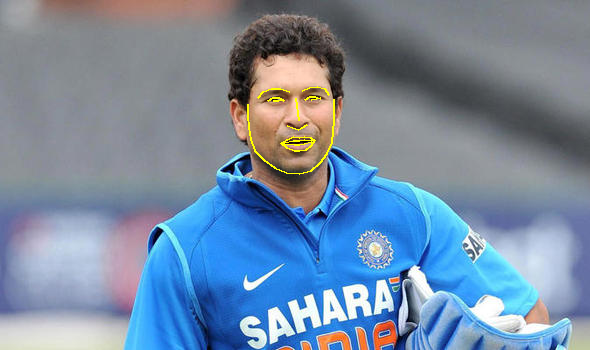

In [4]:
# finding the face landmarks
control_image = face_recognition.load_image_file("sachin-control.jpg")
pil_image_fl = PIL.Image.fromarray(control_image)
draw = PIL.ImageDraw.Draw(pil_image_fl)
face_landmarks_list = face_recognition.face_landmarks(control_image)
for face_landmarks in face_landmarks_list:
    for name, list_of_points in face_landmarks.items():
        print('Landmark: {}\nLocus: {}\n\n'.format(name, list_of_points))
        draw.line(list_of_points, fill='yellow', width=2)
# displaying the image modified with having facial landmarks on face
display(pil_image_fl)

## Generating face encoding

Face encodings are mesaurement of separation between few points on face. We do not know what are those points, because a machine learning model generates those points based on facial landmark. All we know is that we need 128 measurements for perfectly encoding a face. 

In [5]:
# generating face encoding
face_encodings = face_recognition.face_encodings(control_image)
if len(face_encodings) == 0:
    print("no faces detected")
else:
    first_face_encoding = face_encodings[0]
    print(first_face_encoding)

[-0.09196302  0.16604452  0.05857259 -0.1149715  -0.0918283  -0.0137401
 -0.07519327 -0.03927897  0.15610111 -0.06870101  0.30047792  0.0324299
 -0.26590309 -0.17555402 -0.08992261  0.06333029 -0.14980412 -0.16247301
 -0.07210674 -0.01501491  0.01218727  0.00092639  0.04209902 -0.06442213
 -0.06275263 -0.42019171 -0.07564653 -0.06223255  0.07880763 -0.08189024
  0.0247509   0.00554358 -0.19799076 -0.08586991 -0.00338392  0.06203367
  0.02652196  0.03425974  0.18189678  0.00799847 -0.14942268 -0.030227
  0.04240271  0.26160863  0.19224168  0.09722058  0.00486193 -0.03783627
  0.03778214 -0.25043842  0.16239849  0.15792358  0.20816085  0.01480205
  0.16975379 -0.13700525  0.01628003  0.13716941 -0.21949506  0.00621196
  0.03111439  0.01532113 -0.07089196 -0.05806314  0.27822334  0.12271977
 -0.12869431 -0.11712947  0.19683208 -0.13634093 -0.01393377  0.07680985
 -0.02573758 -0.10536955 -0.22054152  0.09190928  0.36613396  0.20556349
 -0.22497976  0.01866795 -0.08618285 -0.06460812  0.032

## Finding people in an image against identified ( control ) people

Three control images (images of known people) are in the main directory. The images of unknown people from "target-images" folder will be evaluated to match against known people. 

Found Sachin


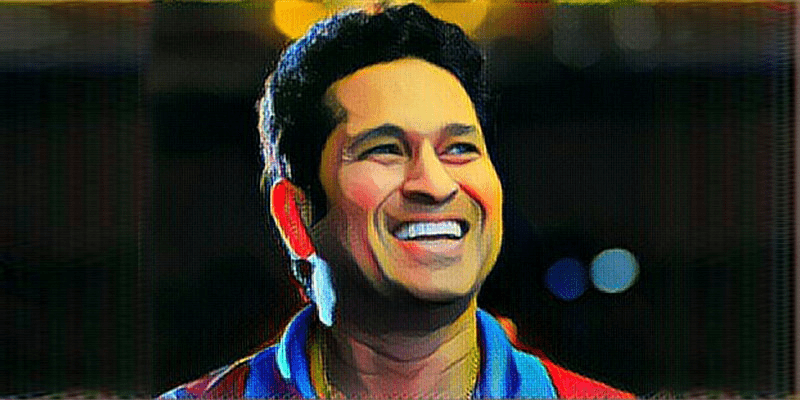




Found Kapil


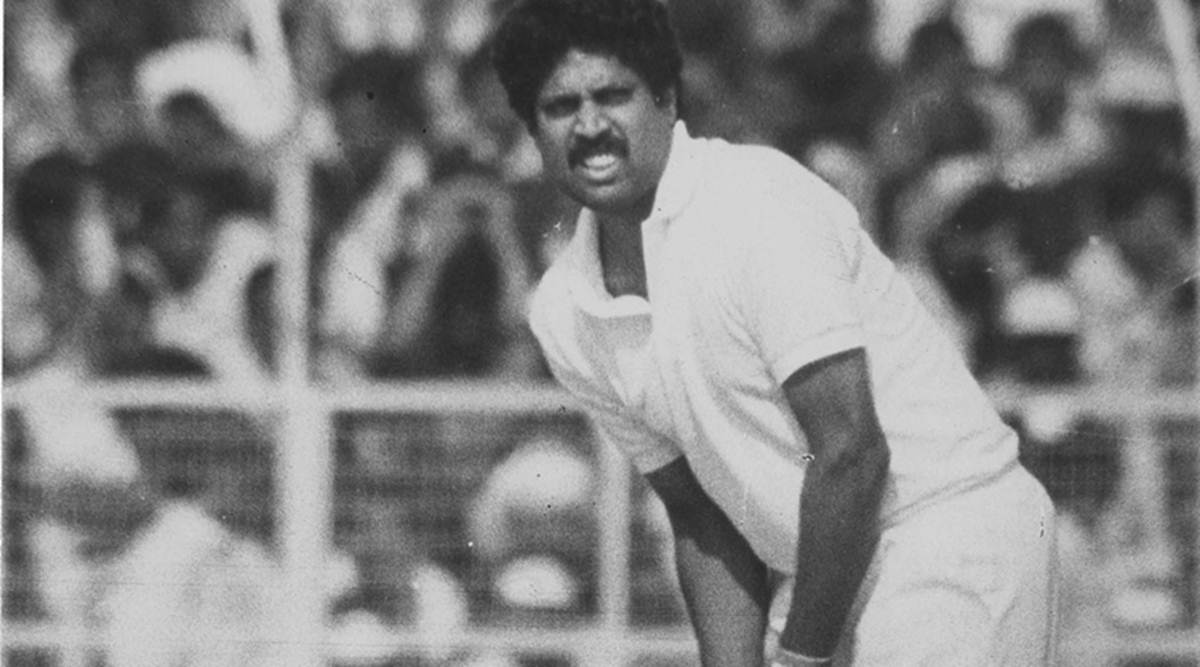




Found Kapil
Found Ganguli


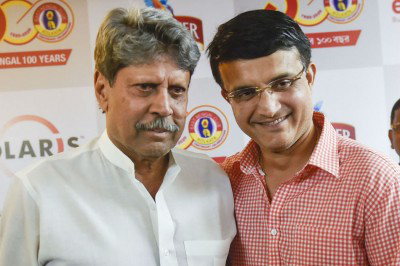




Found Kapil
Found Sachin


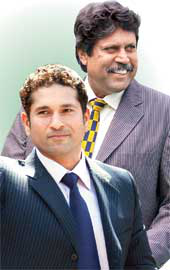




Found Sachin


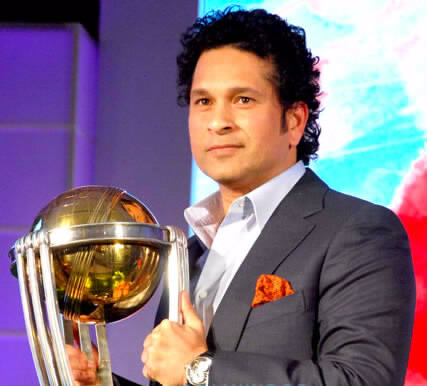




Found Sachin
Found Ganguli


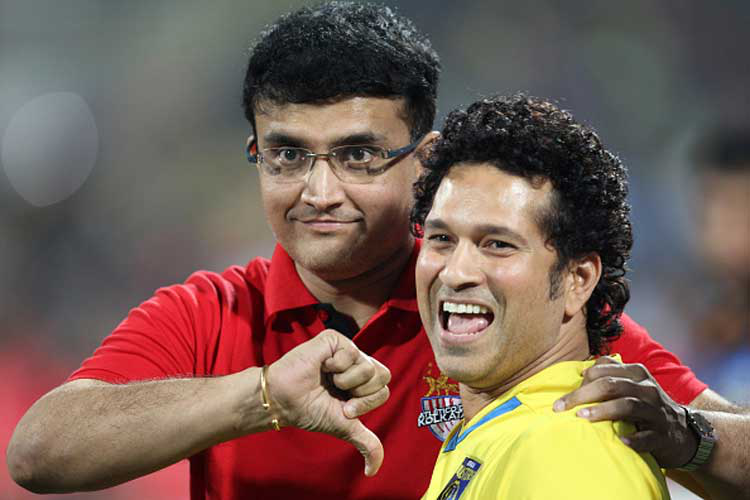




Found Sachin


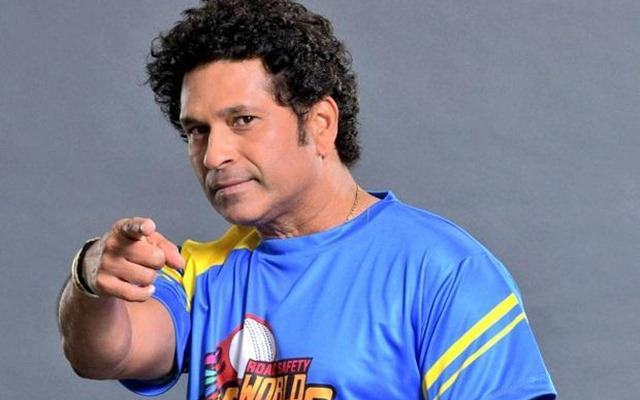




Found Kapil


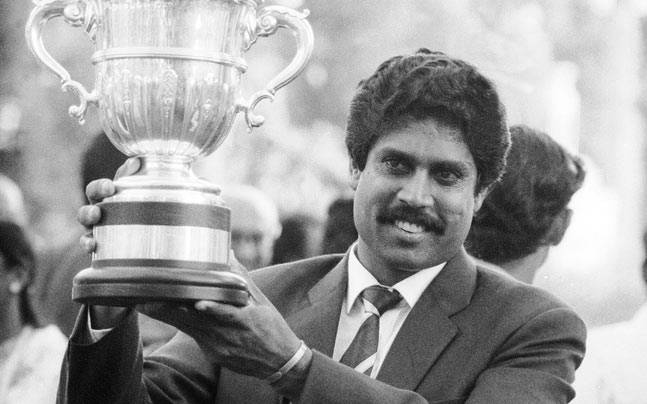




Found Ganguli


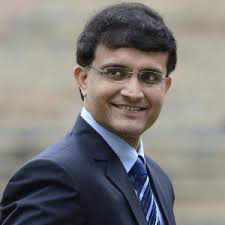




Found Kapil


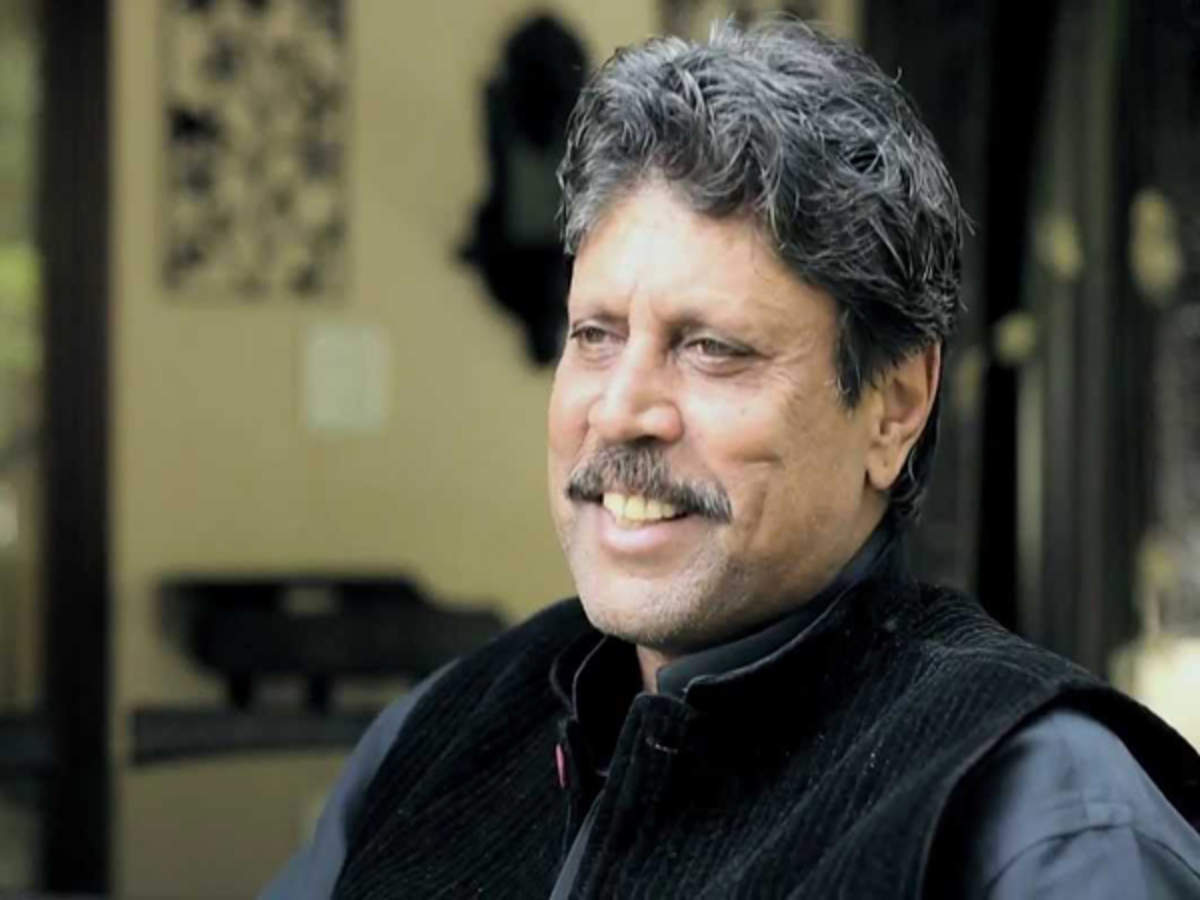




Found Ganguli


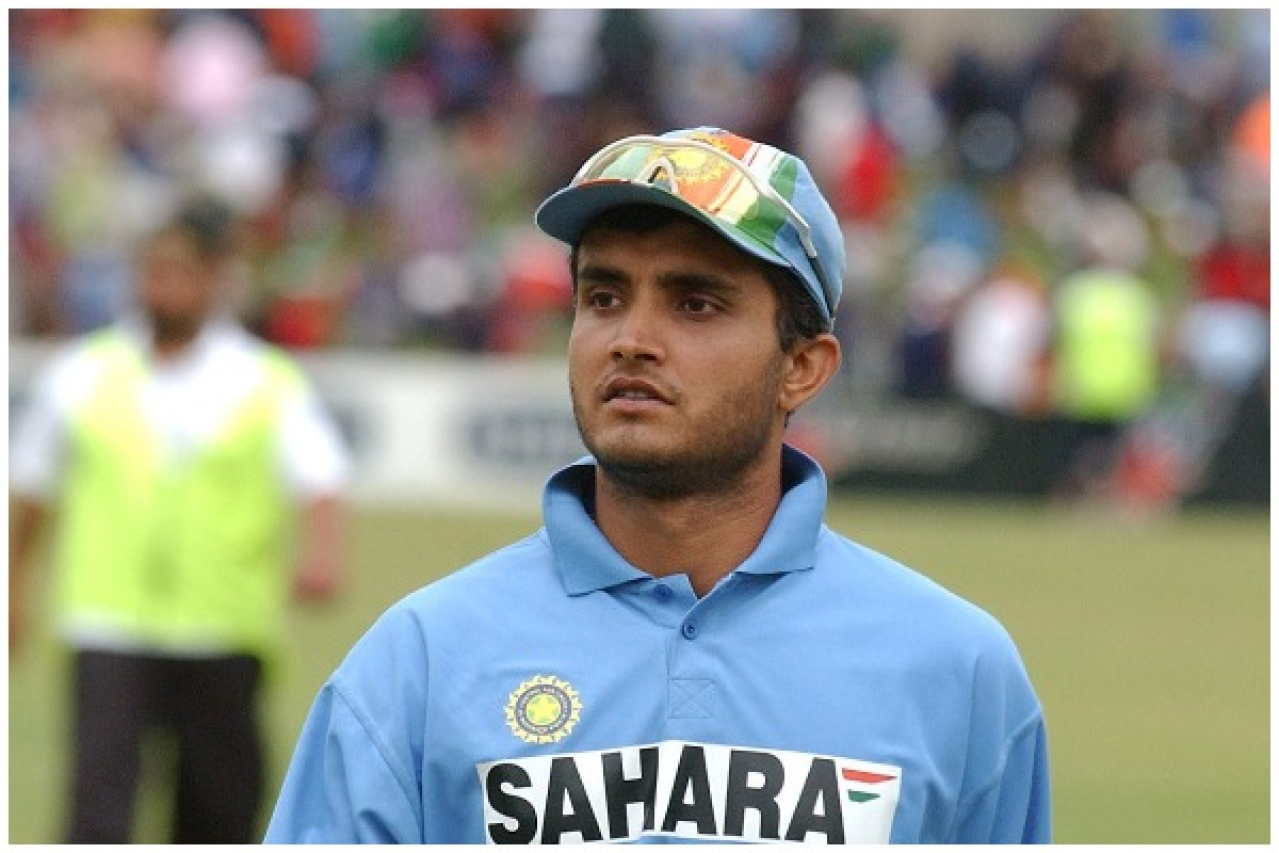

In [7]:
#loading known images
sachin_control = face_recognition.load_image_file("sachin-control.jpg")
ganguli_control = face_recognition.load_image_file("ganguli-control.jpg")
kapil_control = face_recognition.load_image_file("kapil-control.jpg")
#getting face encodings of each person
sachin_face_encoding = face_recognition.face_encodings(sachin_control)[0]
ganguli_face_encoding = face_recognition.face_encodings(ganguli_control)[0]
kapil_face_encoding = face_recognition.face_encodings(kapil_control)[0]
# creating list of all known face encodings
known_face_encodings = [sachin_face_encoding, ganguli_face_encoding, kapil_face_encoding]
# target_images = os.listdir(os.path.join(os.getcwd(), "target-images"))
target_images_path = os.path.join(os.getcwd(), "target-images")
target_images = [f for f in os.listdir(target_images_path) if os.path.isfile(os.path.join(target_images_path, f))]
for target_image in target_images:
    found = []
    target_image = face_recognition.load_image_file(os.path.join(os.getcwd(), "target-images", target_image))
    face_locations = face_recognition.face_locations(target_image, number_of_times_to_upsample=2)
    target_image_face_encodings = face_recognition.face_encodings(target_image, known_face_locations = face_locations)
    for target_image_face_encoding in target_image_face_encodings:
        results = face_recognition.compare_faces(known_face_encodings, target_image_face_encoding)
        name = 'Unknown'
        if(results[0]):
            name = "Sachin"
        elif(results[1]):
            name = "Ganguli"
        elif(results[2]):
            name = "Kapil"
        print("Found", name);
    display(PIL.Image.fromarray(target_image))
    print('\n\n')

## Applying makeup on face

This approach lets you select a face landmark and apply a filter on it

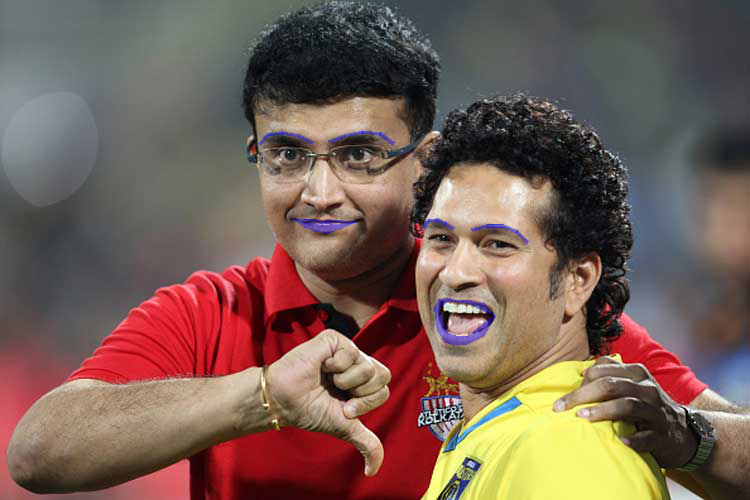

In [8]:
persons_image = face_recognition.load_image_file(os.path.join(os.getcwd(), "target-images", "target-7.jpg"))
persons_face_landmarks_list = face_recognition.face_landmarks(persons_image)
pil_image_persons = PIL.Image.fromarray(persons_image)
d = PIL.ImageDraw.Draw(pil_image_persons, 'RGBA')
for persons_face_landmarks in persons_face_landmarks_list:
    d.line(persons_face_landmarks["left_eyebrow"], fill=(0, 0, 256, 100), width=4)
    d.line(persons_face_landmarks["right_eyebrow"], fill=(0, 0, 256, 100), width=4)
    d.polygon(persons_face_landmarks["top_lip"], fill=(0, 0, 256, 100))
    d.polygon(persons_face_landmarks["bottom_lip"], fill=(0, 0, 256, 100))
pil_image_persons

## Finding lookalike of a random person

Inside the directory "random-people", there is a random person's photo with name "random-control.jpg". This photo will be compared against remaining photos in that direcotry to find which is the most similar face.

This approach finds the Eucledian distance of face encodings of face of this random person against face in each remaining photo and face with least distance is considere the most similar.

Random person


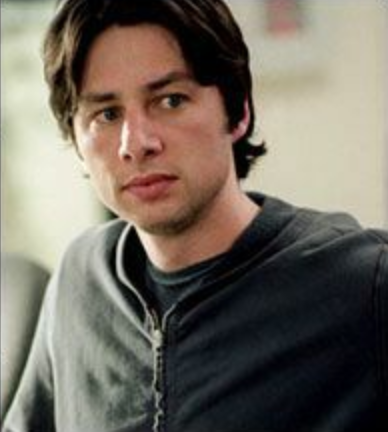


Most similar face


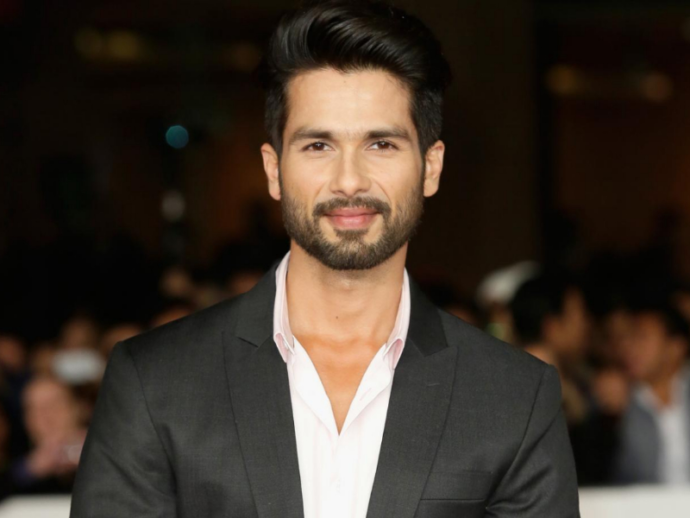

In [10]:
random_person_control_image = face_recognition.load_image_file(os.path.join('random-people', 'random-control.jpg'))
control_image_encoding = face_recognition.face_encodings(random_person_control_image)[0]
best_face_distance = 1.0
best_face_image = None
for random_image_path in Path("random-people").glob("*.png"):
    random_image = face_recognition.load_image_file(random_image_path)
    face_encodings = face_recognition.face_encodings(random_image)
    face_distance = face_recognition.face_distance(face_encodings, control_image_encoding)[0]
    if(face_distance < best_face_distance):
        best_face_distance = face_distance
        best_face_image = random_image
pil_image_best_face = PIL.Image.fromarray(best_face_image)
print("Random person")
display(PIL.Image.fromarray(random_person_control_image))
print("\nMost similar face")
display(pil_image_best_face)